# Cross-validation

In the machine learning examples, we have already shown the importance of split training and splitting data. However, a rough trial is not enough. Because if we randomly assign a training and testing data, it could be bias. We could improve it by cross validation.

First, let's review how we split training and spliting:

In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

/home/neha/.pyenv/versions/3.6.2/envs/ENV3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.973684210526


**Question 1:** If you haven't learn KNN, please first search it and please answer this simple question: Is it a supervised learning or an unsupervised learning? Also please answer, in the previous example, what does n_neighbors=5 mean?

**Answer:** Double click this cell and input your answer here.

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.

## Cross-validation example: 

In [4]:
from sklearn.cross_validation import cross_val_score

In [5]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# First we initialize a knn model
knn = KNeighborsClassifier(n_neighbors=5)

# Secondly we use cross_val_scores to get all possible accuracies. 
# It works like this, first we make the data into 10 chunks. 
# Then we run KNN for 10 times and we make each chunk as testing data for each iteration.
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [6]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


From this example, we could see that if we just split training and testing data for just once, sometimes we could get a very "good model and sometimes we may have got a very ""bad" model. From the example, we could know that it is not about model itself. It is just because we use different set of training data and test data.



## Your exercise for cross-validation

From the previous example, we may have question, how we choose the parameter for knn? (n_neighbors=?). A good way to do it is called tuning parameters. In this exercise, we could learn how to tune your parameter by taking the advantage of corss-validation. 

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

## Your programming task: 

From the above example, we know that, if we set number of neighbors as K=5, we could get an average accuracy as 0.97. However, if we want to find a better number, what should we do? It is very straight forward, we could iteratively set different numbers for K and find what K could bring us the best accuaracy.

In [7]:
# search for an optimal value of K for KNN
# Suppose we set the range of K is from 1 to 31.
k_range = list(range(1, 31))

# An list that stores different accuracy scores.
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0,0.5,'Cross-Validated Accuracy')

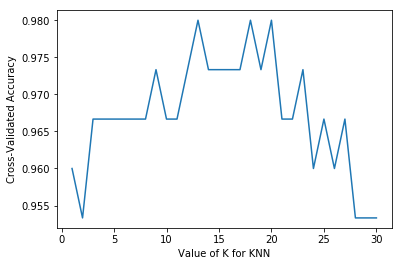

In [8]:
# Make a visuliazaion for it, and please check what is the best k for knn
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## A new Cross-validation task: model selection

We already apply cross-validation to knn model. How about other models? Please continue to read the notes and do another exercise.

In [9]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [10]:
# How about logistic regression? Please finish the code below and make a comparison.
# Hint, please check how we make it by knn.
from sklearn.linear_model import LogisticRegression

logregmod = LogisticRegression()
scores = cross_val_score(logregmod, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 1.          1.          1.          0.93333333  0.93333333  0.93333333
  0.8         0.93333333  1.          1.        ]
0.953333333333
